In [1]:
import qiskit as q
from qiskit.tools.visualization import plot_histogram

%matplotlib inline

In [39]:
secret = '110010010011'

In [40]:
circuit = q.QuantumCircuit(len(secret)+1, len(secret))

#circuit.h([0, 1, 2, 3, 4, 5])
#circuit.x(6)
#circuit.h(6)

circuit.h(range(len(secret)))
circuit.x(len(secret))
circuit.h(len(secret))

circuit.barrier()


#circuit.cx(5, 6)
#circuit.cx(3, 6)
#circuit.cx(0, 6)

for i , val in enumerate(reversed(secret)):
    
    if val == '1':
        circuit.cx(i, len(secret))

circuit.barrier()

#circuit.h([0, 1, 2, 3, 4, 5])

circuit.h(range(len(secret)))

circuit.barrier()

circuit.measure(range(len(secret)), range(len(secret)))

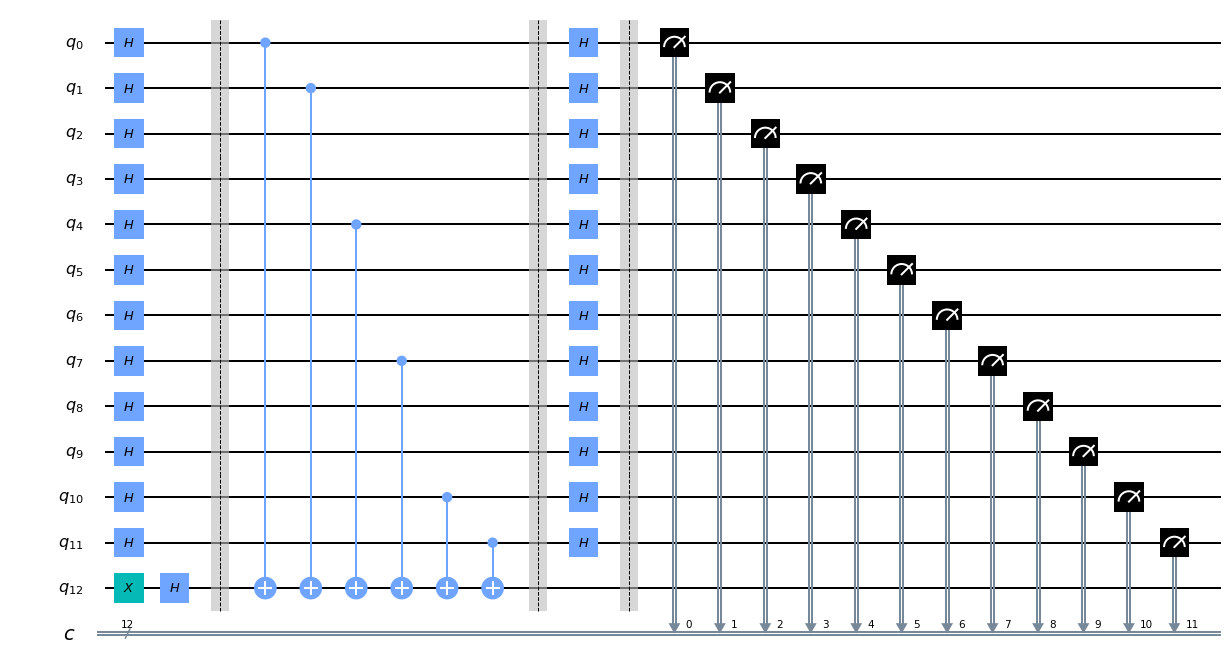

In [41]:
circuit.draw(output = 'mpl')

In [42]:
simulator = q.Aer.get_backend('qasm_simulator')
result = q.execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'110010010011': 1}
